<a href="https://colab.research.google.com/github/tobin7714/HR--Analytics/blob/main/Copy_of_HR_ANALYTICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DATASET


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'general_data.csv'
df = pd.read_csv(file_path)
df = df.drop(["EmployeeCount","EmployeeID","Over18","StandardHours"], axis =1)

# Assign dependent and independent variables
y = df['Attrition']
X = df.drop(columns=['Attrition'])

# Display the first few rows of y and X to confirm
y.head()


,Attrition
0,No
1,Yes
2,No
3,No
4,No


In [ ]:
X.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4


###HANDLING MISSING VALUES

In [ ]:
from sklearn.impute import SimpleImputer
# Separating numeric and categorical columns
numeric_columns = X.select_dtypes(include=['number']).columns

# Imputing missing values for numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
X[numeric_columns] = numeric_imputer.fit_transform(X[numeric_columns])

In [ ]:
X.isnull().sum()

,0
Age,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
Gender,0
JobLevel,0
JobRole,0
MaritalStatus,0


In [ ]:
X.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51.0,Travel_Rarely,Sales,6.0,2.0,Life Sciences,Female,1.0,Healthcare Representative,Married,131160.0,1.0,11.0,0.0,1.0,6.0,1.0,0.0,0.0
1,31.0,Travel_Frequently,Research & Development,10.0,1.0,Life Sciences,Female,1.0,Research Scientist,Single,41890.0,0.0,23.0,1.0,6.0,3.0,5.0,1.0,4.0
2,32.0,Travel_Frequently,Research & Development,17.0,4.0,Other,Male,4.0,Sales Executive,Married,193280.0,1.0,15.0,3.0,5.0,2.0,5.0,0.0,3.0
3,38.0,Non-Travel,Research & Development,2.0,5.0,Life Sciences,Male,3.0,Human Resources,Married,83210.0,3.0,11.0,3.0,13.0,5.0,8.0,7.0,5.0
4,32.0,Travel_Rarely,Research & Development,10.0,1.0,Medical,Male,1.0,Sales Executive,Single,23420.0,4.0,12.0,2.0,9.0,2.0,6.0,0.0,4.0


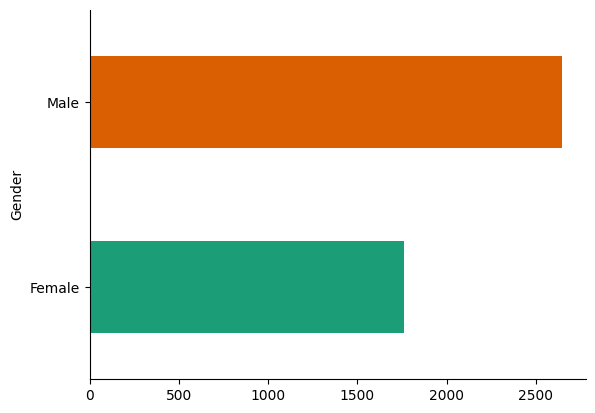

In [ ]:
# @title Gender

from matplotlib import pyplot as plt
import seaborn as sns
X.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

###ENCODING CATEGORICAL DATA

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
y

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
X['EducationField'] = le.fit_transform(X['EducationField'])
X['MaritalStatus'] = le.fit_transform(X['MaritalStatus'])
X['JobRole'] = le.fit_transform(X['JobRole'])
X['BusinessTravel'] = le.fit_transform(X['BusinessTravel'])
X['Department'] = le.fit_transform(X['Department'])

In [ ]:
X

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51.0,2,2,6.0,2.0,1,0,1.0,0,1,131160.0,1.0,11.0,0.0,1.000000,6.0,1.0,0.0,0.0
1,31.0,1,1,10.0,1.0,1,0,1.0,6,2,41890.0,0.0,23.0,1.0,6.000000,3.0,5.0,1.0,4.0
2,32.0,1,1,17.0,4.0,4,1,4.0,7,1,193280.0,1.0,15.0,3.0,5.000000,2.0,5.0,0.0,3.0
3,38.0,0,1,2.0,5.0,1,1,3.0,1,1,83210.0,3.0,11.0,3.0,13.000000,5.0,8.0,7.0,5.0
4,32.0,2,1,10.0,1.0,3,1,1.0,7,2,23420.0,4.0,12.0,2.0,9.000000,2.0,6.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42.0,2,1,5.0,4.0,3,0,1.0,6,2,60290.0,3.0,17.0,1.0,10.000000,5.0,3.0,0.0,2.0
4406,29.0,2,1,2.0,4.0,3,1,1.0,2,0,26790.0,2.0,15.0,0.0,10.000000,2.0,3.0,0.0,2.0
4407,25.0,2,1,25.0,2.0,1,1,2.0,7,1,37020.0,0.0,20.0,0.0,5.000000,4.0,4.0,1.0,2.0
4408,42.0,2,2,18.0,2.0,3,1,1.0,2,0,23980.0,0.0,14.0,1.0,10.000000,2.0,9.0,7.0,8.0


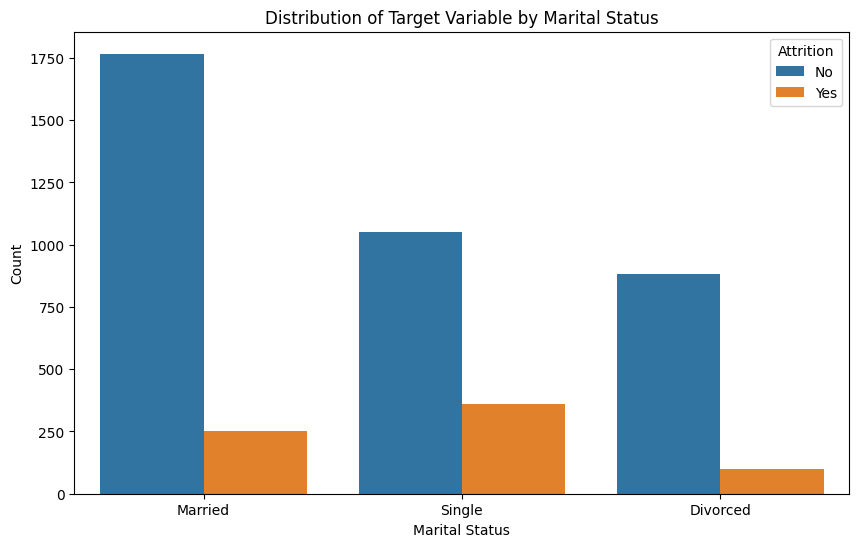

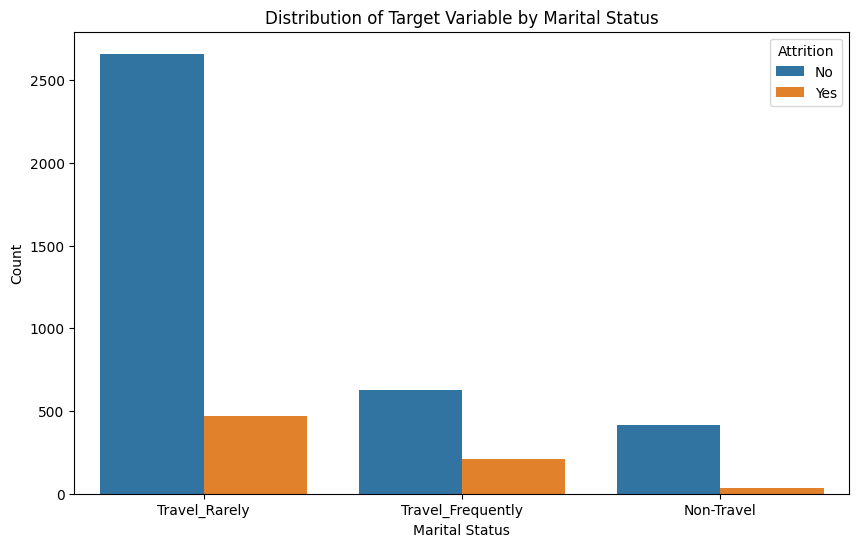

In [ ]:
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x="MaritalStatus", hue="Attrition", data=df)

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Target Variable by Marital Status')

# Show the plot
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x="BusinessTravel", hue="Attrition", data=df)

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Target Variable by Marital Status')

# Show the plot
plt.show()

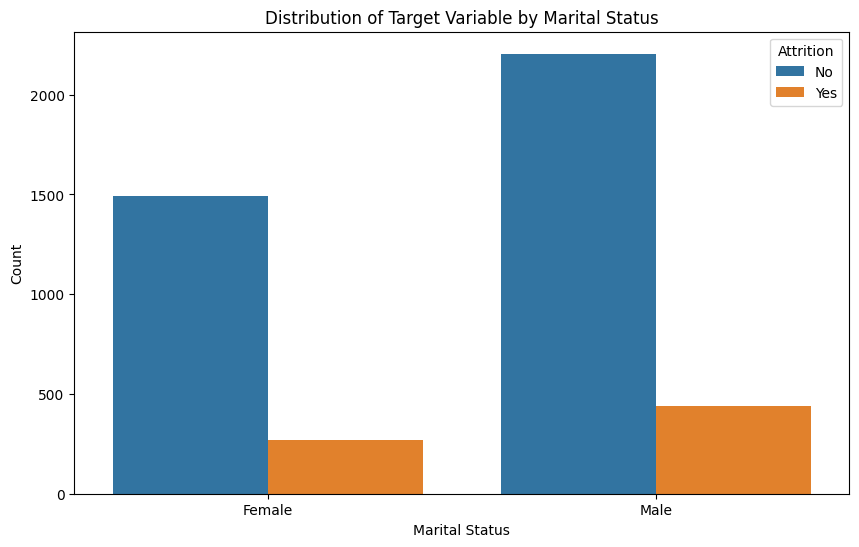

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x="Gender", hue="Attrition", data=df)

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Target Variable by Marital Status')

# Show the plot
plt.show()

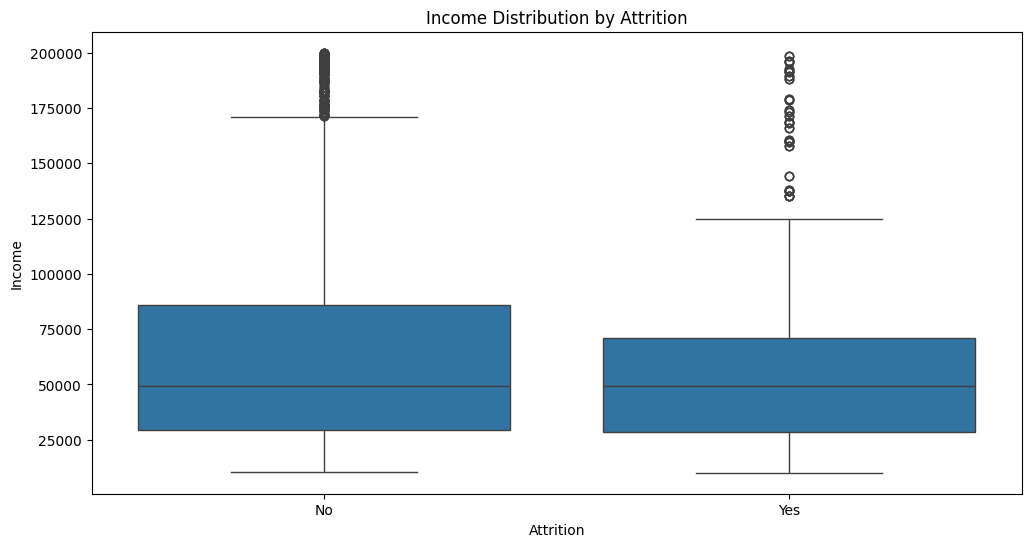

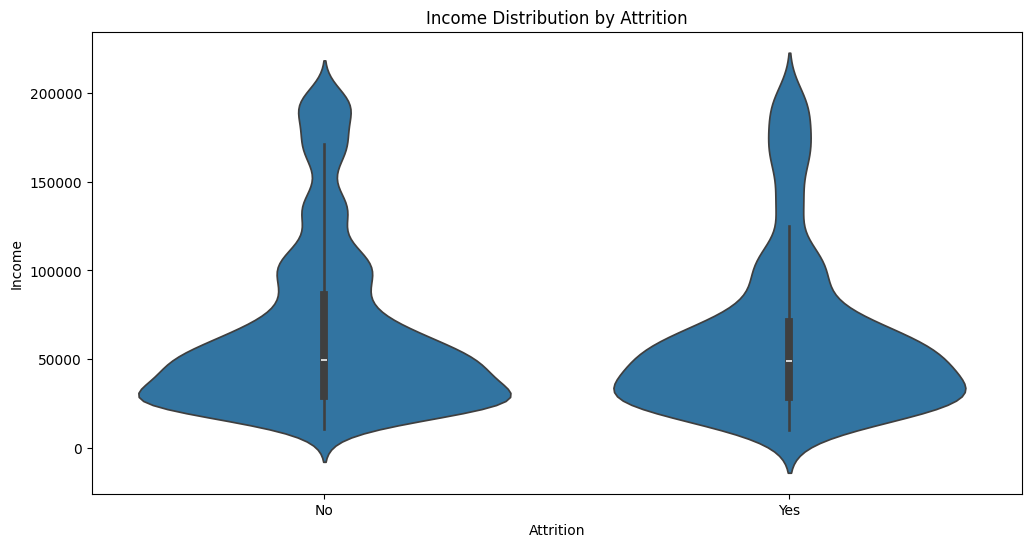

In [ ]:

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)

# Add labels and title
plt.xlabel('Attrition')
plt.ylabel('Income')
plt.title('Income Distribution by Attrition')

# Show the plot
plt.show()

# Create a violin plot for additional visualization
plt.figure(figsize=(12, 6))
sns.violinplot(x="Attrition", y="MonthlyIncome", data=df)

# Add labels and title
plt.xlabel('Attrition')
plt.ylabel('Income')
plt.title('Income Distribution by Attrition')

# Show the plot
plt.show()


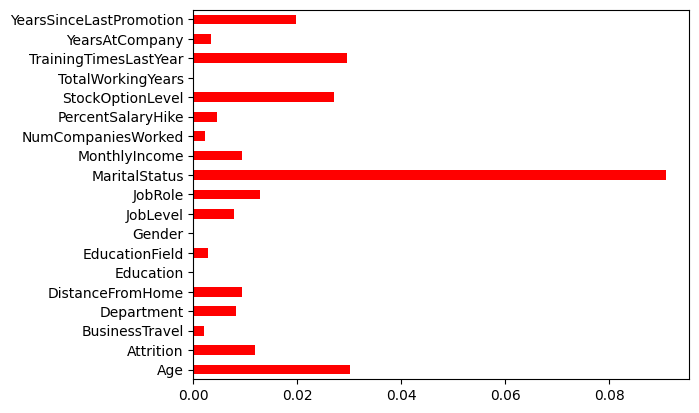

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

# Assuming X and y are already defined and df is the DataFrame containing the data
importances = mutual_info_classif(X, y)
fi = pd.Series(importances, index=df.columns[0:len(df.columns)-1])
fi.plot(kind='barh', color='red')
plt.show()


This graph shows which feature influences the attrition more.

###Splitting training set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Convert scaled data to appropriate data types
x_train_scaled = np.array(x_train_scaled, dtype=np.float32)
x_test_scaled = np.array(x_test_scaled, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

##LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(x_train, y_train)

# Make predictions (probabilities)
proba = clf.predict_proba(x_test)

# Convert probabilities to percentages
percentage_proba = proba * 100

for i, (original, probs) in enumerate(zip(y_test, percentage_proba)):
    print(f"Sample {i} (Original values: {original}):")
    for class_index, class_proba in enumerate(probs):
        print(f"  Class {class_index}: {class_proba:.2f}%")

Sample 0 (Original values: 0.0):
  Class 0: 95.53%
  Class 1: 4.47%
Sample 1 (Original values: 0.0):
  Class 0: 70.50%
  Class 1: 29.50%
Sample 2 (Original values: 0.0):
  Class 0: 92.57%
  Class 1: 7.43%
Sample 3 (Original values: 1.0):
  Class 0: 75.20%
  Class 1: 24.80%
Sample 4 (Original values: 0.0):
  Class 0: 79.74%
  Class 1: 20.26%
Sample 5 (Original values: 0.0):
  Class 0: 95.74%
  Class 1: 4.26%
Sample 6 (Original values: 0.0):
  Class 0: 92.56%
  Class 1: 7.44%
Sample 7 (Original values: 0.0):
  Class 0: 67.08%
  Class 1: 32.92%
Sample 8 (Original values: 0.0):
  Class 0: 76.15%
  Class 1: 23.85%
Sample 9 (Original values: 0.0):
  Class 0: 80.93%
  Class 1: 19.07%
Sample 10 (Original values: 0.0):
  Class 0: 83.72%
  Class 1: 16.28%
Sample 11 (Original values: 0.0):
  Class 0: 89.49%
  Class 1: 10.51%
Sample 12 (Original values: 0.0):
  Class 0: 69.01%
  Class 1: 30.99%
Sample 13 (Original values: 0.0):
  Class 0: 97.74%
  Class 1: 2.26%
Sample 14 (Original values: 0.0):
 

Class 0 is the percentage that there will not be an attrition                 
Class 1 is the percentage that there will be an attrition

##ANN MODEL TO PREDICT

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
tf.__version__

'2.17.0'

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 120)

Epoch 1/120
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7418 - loss: 7.6488
Epoch 2/120
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7244 - loss: 10.8421
Epoch 3/120
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7545 - loss: 4.4622
Epoch 4/120
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7447 - loss: 6.2558
Epoch 5/120
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7675 - loss: 3.8146
Epoch 6/120
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7790 - loss: 4.2618
Epoch 7/120
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7611 - loss: 3.0757
Epoch 8/120
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7664 - loss: 4.5418
Epoch 9/120
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7433 - loss: 8.0496
Epoch 10/120
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7719 - loss: 5.2471
Epoch 11/120
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7555 - loss: 4.1023
Epoch 12/120
111/111 ━━━━━━━━━━━━━━━━━━━

In [ ]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 1.]
 [0. 0.]
 [0. 0.]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[741   0]
 [141   0]]


0.8401360544217688